In [ ]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

random.seed(231)
# random.seed(420)

learning_rate = 0.001
time_steps = 100
window = 4
epochs = 1000

In [14]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[1] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i*100:i*100+100] for i in range(6)]
training_groups = [[x for x in group] for group in training_set]
print(len(training_set[0]))
# print(training_set)

100


In [30]:
# Initialize Network with Nguyen_Widrow weighting
x_network = RNN(window, 2, 1)
x_network.nguyen_widrow()
# training_set = training_groups[0]
# Train Network on First Training Set
training_set = [float((np.sin(x/2))) for x in range(time_steps)]
error = x_network.train(training_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)
# print(error)

# print(x_network.w)
# print(x_network.v)

092228678427
Epoch 433 	MSE 0.054263623712599234
Epoch 434 	MSE 0.05422666098001099
Epoch 435 	MSE 0.05419003047404693
Epoch 436 	MSE 0.05415372861013004
Epoch 437 	MSE 0.05411775183396357
Epoch 438 	MSE 0.054082096621411384
Epoch 439 	MSE 0.05404675947837348
Epoch 440 	MSE 0.05401173694065704
Epoch 441 	MSE 0.053977025573843165
Epoch 442 	MSE 0.053942621973149446
Epoch 443 	MSE 0.0539085227632879
Epoch 444 	MSE 0.05387472459831927
Epoch 445 	MSE 0.053841224161503505
Epoch 446 	MSE 0.05380801816514571
Epoch 447 	MSE 0.05377510335043923
Epoch 448 	MSE 0.05374247648730449
Epoch 449 	MSE 0.05371013437422487
Epoch 450 	MSE 0.05367807383807876
Epoch 451 	MSE 0.053646291733968746
Epoch 452 	MSE 0.05361478494504778
Epoch 453 	MSE 0.05358355038234183
Epoch 454 	MSE 0.053552584984570564
Epoch 455 	MSE 0.053521885717964277
Epoch 456 	MSE 0.053491449576079396
Epoch 457 	MSE 0.05346127357961053
Epoch 458 	MSE 0.053431354776200674
Epoch 459 	MSE 0.05340169024024934
Epoch 460 	MSE 0.0533722770727182

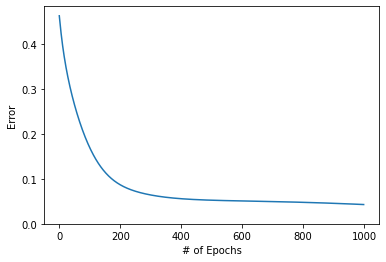

In [31]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

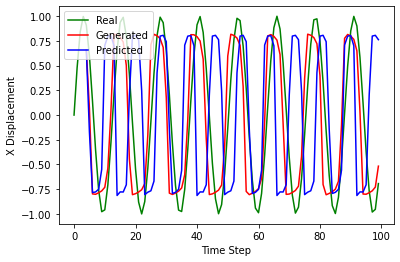

In [32]:
x = training_set[0:4]
x_generated = [None, None, None, None] #First 4 timesteps come from the original function
x_predicted = [None, None, None, None]
for time in range(window,time_steps):
    _, y, _ = x_network.feed_forward(training_set[time-window:time])
    _, z, _ = x_network.feed_forward(x)
    # x = z
    x.append(z[0])
    x = x[1:]
    x_predicted.append(*z)
    x_generated.append(*y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:time_steps], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

In [17]:
print(x_network.u)
print(np.array(x_network.w))
print(np.array(x_network.v))

[1.783415274717366, 1.0607729749527093]
[[-1.67550696]
 [-5.55876787]
 [ 3.3877923 ]]
[[ 0.27888737  0.45405279]
 [ 0.01575018  1.05204271]
 [ 2.73265416 -0.36997626]
 [ 3.15659011 -1.74304873]
 [ 1.02076573 -0.5331605 ]]


In [18]:
print(np.clip(x_network.h, -1, 1))

[[-0.49174314 -0.90810678]
 [-0.4919438  -0.90810678]]
